In [2]:
import pandas as pd
import matplotlib.pyplot as plt

def KKR_kvartal_ZU(file_name):
    # cчитываем данные из переданного файла
    df_zu = pd.read_excel(file_name, header=12)
    
    # переименование столбцов
    df_zu = df_zu.rename(columns={
        'Вид ЗУ': 'view_zu', 
        'Категория': 'category', 
        'Статус ЕГРН': 'status', 
        'Адрес 2': 'adress', 
        'Тип плошади': 'area',
        'Координаты есть/нет': 'coordinate'
    })
    
    # преобразуем данные
    df_zu['agriculture'] = df_zu['view_zu'].apply(lambda x: 1 if x == 'Землепользование' else None)
    df_zu['lands of settlements'] = df_zu['category'].apply(lambda x: 1 if x == 'Земли населенных пунктов' else None)
    df_zu['other_lands'] = df_zu['category'].apply(lambda x: 1 if x != 'Земли населенных пунктов' else None)
    df_zu['status_active'] = df_zu['status'].apply(lambda x: 1 if x == 'Актуальный' else None)
    df_zu['status_archive'] = df_zu['status'].apply(lambda x: 1 if x == 'Архивный' else None)
    df_zu['area_upd'] = df_zu['area'].apply(lambda x: 1 if x == 'Уточненная площадь' else None)
    df_zu['area_not_upd'] = df_zu['area'].apply(lambda x: 1 if x == 'Декларированная площадь' else None)
    df_zu['сoordinate_yes'] = df_zu['coordinate'].apply(lambda x: 1 if x == 'Да' else None)
    df_zu['сoordinate_no'] = df_zu['coordinate'].apply(lambda x: 1 if x == 'Нет' else None)
    df_zu['not_verification'] = df_zu['adress'].apply(lambda x: 1 if any(word in x for word in ['Участок', 'участок', 'уч', 'Уч']) else None)
    df_zu['verification'] = df_zu['adress'].apply(lambda x: 1 if not any(word in x for word in ['Участок', 'участок', 'уч', 'Уч']) else None)

    # подсчитываем
    df_zu_view_zu = df_zu['agriculture'].value_counts()
    df_lands_of_settlements = df_zu['lands of settlements'].value_counts()
    df_other_lands = df_zu['other_lands'].value_counts()
    df_status_active = df_zu['status_active'].value_counts()
    df_status_archive = df_zu['status_archive'].value_counts()
    df_area_upd = df_zu['area_upd'].value_counts()
    df_area_not_upd = df_zu['area_not_upd'].value_counts()
    df_сoordinate_yes = df_zu['сoordinate_yes'].value_counts()
    df_сoordinate_no = df_zu['сoordinate_no'].value_counts()
    df_verification = df_zu['verification'].value_counts()
    df_not_verification = df_zu['not_verification'].value_counts()

    # создаем новый датафрейм с подсчетами
    df_2 = pd.DataFrame({
        'agriculture': df_zu_view_zu,
        'lands of settlements': df_lands_of_settlements,
        'other_lands': df_other_lands,
        'status_active': df_status_active,
        'status_archive': df_status_archive,
        'area_upd': df_area_upd,
        'area_not_upd': df_area_not_upd,
        'сoordinate_yes': df_сoordinate_yes,
        'сoordinate_no': df_сoordinate_no,
        'verification': df_verification,
        'not_verification': df_not_verification
    })

    melted_df = df_2.melt(var_name='category', value_name='value')

    # создаем график
    plt.figure(figsize=(12, 8))
    plt.bar(melted_df['category'], melted_df['value'], color='skyblue', alpha=0.7)

    for i, value in enumerate(melted_df['value']):
        plt.text(i, value, str(value), ha='center', va='bottom')

    plt.title('Категории при выгрузке ЗУ')
    plt.xlabel('Категории')
    plt.ylabel('Значения')

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # подсчет и вывод информации
    num_df = len(df_zu)
    archive_kadastr_zu = df_zu.query('status_archive == 1')['Кад №']
    apea_not_upd_zu = df_zu.query('area_not_upd == 1')['Кад №']
    verification_not_zu = df_zu.query('verification == 1')['Кад №']
    df_area_not_upd_2 = len(apea_not_upd_zu)
    coordinate_not_zu = df_zu.query('сoordinate_no == 1')['Кад №']
    coordinate_not_zu_2 = len(coordinate_not_zu)

    result_text = (
        f'Всего земельных участков в кадастровом квартале: {num_df}\n'
        f'Архивные кадастровые номера земельных участков, которые не нужно рассматривать в рамках комплексных кадастровых работ:\n'
        + '\n'.join(map(str, archive_kadastr_zu)) + '\n'
        f'Кол-во земельных участков с декларированной площадью (необходимо уточнение границ): {df_area_not_upd_2}\n'
        f'Кол-во земельных участков, у которых отсутствуют границы в ЕГРН: {coordinate_not_zu_2}\n'
        f'Земельные участки, в адресе которых отсутствует номер участка и необходимо провести дополнительную верификацию в отношении этих объектов:\n'
        + '\n'.join(map(str, verification_not_zu))
    )
    
    return result_text

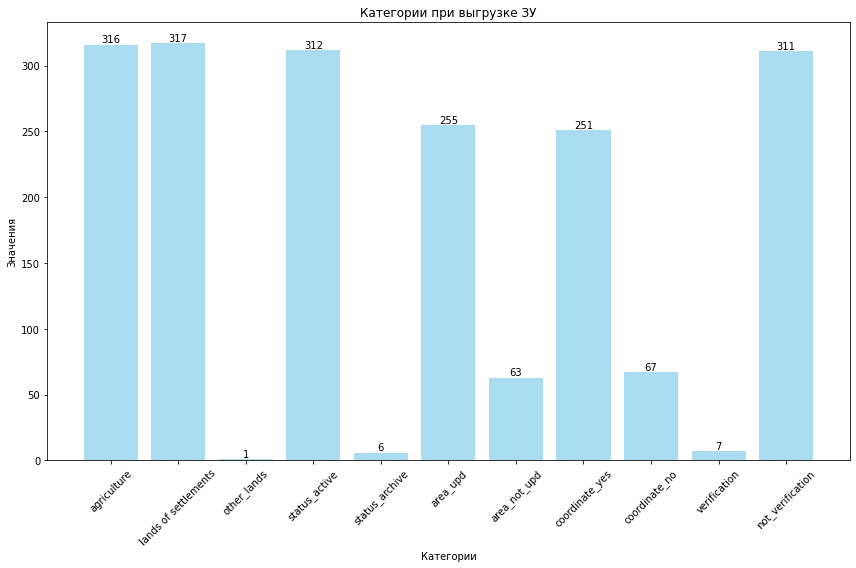

Всего земельных участков в кадастровом квартале: 318
Архивные кадастровые номера земельных участков, которые не нужно рассматривать в рамках комплексных кадастровых работ:
74:36:0312022:254
74:36:0312022:390
74:36:0312022:392
74:36:0312022:399
74:36:0312022:402
74:36:0312022:466
Кол-во земельных участков с декларированной площадью (необходимо уточнение границ): 63
Кол-во земельных участков, у которых отсутствуют границы в ЕГРН: 67
Земельные участки, в адресе которых отсутствует номер участка и необходимо провести дополнительную верификацию в отношении этих объектов:
74:36:0312022:254
74:36:0312022:320
74:36:0312022:372
74:36:0312022:390
74:36:0312022:399
74:36:0312022:428
74:36:0312022:444


In [3]:
result = KKR_kvartal_ZU('kad_zu.xlsx')
print(result)

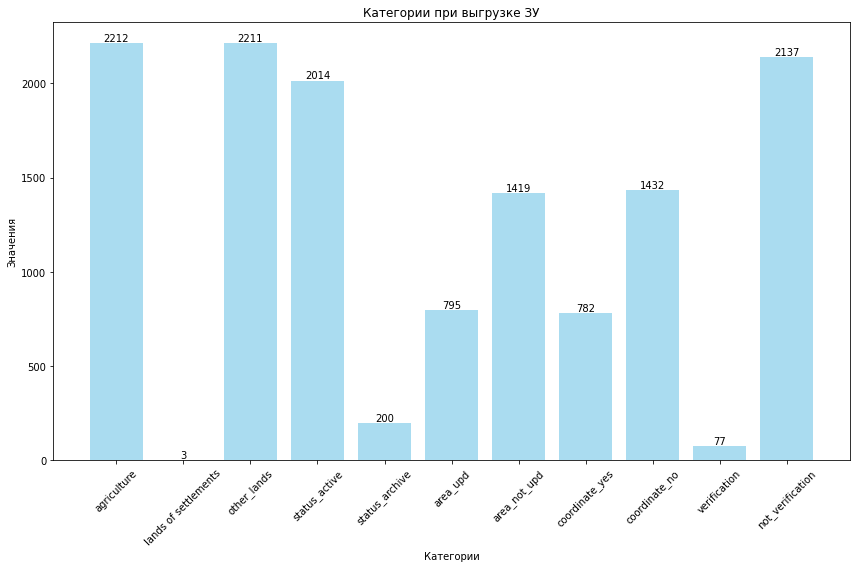

Всего земельных участков в кадастровом квартале: 2214
Архивные кадастровые номера земельных участков, которые не нужно рассматривать в рамках комплексных кадастровых работ:
74:19:1501008:1021
74:19:1501008:1039
74:19:1501008:1051
74:19:1501008:1118
74:19:1501008:1136
74:19:1501008:1168
74:19:1501008:1187
74:19:1501008:1212
74:19:1501008:1215
74:19:1501008:1270
74:19:1501008:1299
74:19:1501008:1307
74:19:1501008:1320
74:19:1501008:1637
74:19:1501008:1659
74:19:1501008:166
74:19:1501008:1660
74:19:1501008:1669
74:19:1501008:1674
74:19:1501008:1714
74:19:1501008:1719
74:19:1501008:1720
74:19:1501008:1750
74:19:1501008:1761
74:19:1501008:1769
74:19:1501008:197
74:19:1501008:225
74:19:1501008:2480
74:19:1501008:2489
74:19:1501008:2527
74:19:1501008:2528
74:19:1501008:2533
74:19:1501008:2534
74:19:1501008:2538
74:19:1501008:2539
74:19:1501008:2557
74:19:1501008:2560
74:19:1501008:2578
74:19:1501008:2580
74:19:1501008:2589
74:19:1501008:2594
74:19:1501008:2600
74:19:1501008:2605
74:19:1501008

In [4]:
result = KKR_kvartal_ZU('new_kvartal_zu.xlsx')
print(result)